<h1><center>Boston House Prices</center></h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Boston_-_panoramio_%2823%29.jpg" style="width: 750px;"/>

   ## Introduction

The aim of this project is to analyse the Boston house prices dataset from the UCI Machine Learning Repository, by firstly using descriptive statistics and plots to describe the Boston House Prices, secondly using inferential statistics to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t and lastly to create a neural network that can predict the median house price based on the other variables in the dataset.

The Boston house price dataset consists of house prices from various parts of Boston city. These house prices are based on attributes including information on Crime (CRIM), average number of rooms per dwelling (RM), proportion of owner-occupied units built prior to 1940 (AGE), neighbourhoods with more lower-class workers (LSTAT) and there are other variables which can be seen below. This data was collected in 1978 and consists of only 506 cases.

### DATA

Import the libraries required to complete this project, using sklearn and display the shape and the features of this dataset. 

In [45]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston 
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import tensorflow as tf
import scipy.stats as stats

# Magic line in plt
%matplotlib inline

boston = load_boston()

# Print the no. of rows and columns
print("Shape of the dataset:", boston.data.shape) 

# Print the description of the dataset
print("\n", boston.DESCR) 

Shape of the dataset: (506, 13)

 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate

## 1.  Descriptive Statistics

For part one of this project, descriptive statistics and plots are to be completed to describe the Boston house prices. A descriptive statistic is a summary statistic that quantitatively describes or summarizes features of a collection of information, while descriptive statistics is the process of using and analysing those statistics [1].

Download the dataset and then calculate the minimum, maximum, mean, median, and standard deviation for each attribute and Price of the houses. 

In [46]:
# Converting data from nd-array to pandas dataframe, re-naming column names & Price Column
data = pd.DataFrame(boston.data) 
data.columns = boston.feature_names 
data['PRICE'] = boston.target

# Print the first 5 rows of the dataset with four decimal places
data.head(5).round(4) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.0063,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.0273,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.0273,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.0324,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.0690,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [47]:
# Run a summary statistics rounding to four deciaml place
data.describe().round(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000,506.0000
mean,3.6135,11.3636,11.1368,0.0692,0.5547,6.2846,68.5749,3.7950,9.5494,408.2372,18.4555,356.6740,12.6531,22.5328
std,8.6015,23.3225,6.8604,0.2540,0.1159,0.7026,28.1489,2.1057,8.7073,168.5371,2.1649,91.2949,7.1411,9.1971
min,0.0063,0.0000,0.4600,0.0000,0.3850,3.5610,2.9000,1.1296,1.0000,187.0000,12.6000,0.3200,1.7300,5.0000
25%,0.0820,0.0000,5.1900,0.0000,0.4490,5.8855,45.0250,2.1002,4.0000,279.0000,17.4000,375.3775,6.9500,17.0250
50%,0.2565,0.0000,9.6900,0.0000,0.5380,6.2085,77.5000,3.2074,5.0000,330.0000,19.0500,391.4400,11.3600,21.2000
75%,3.6771,12.5000,18.1000,0.0000,0.6240,6.6235,94.0750,5.1884,24.0000,666.0000,20.2000,396.2250,16.9550,25.0000
max,88.9762,100.0000,27.7400,1.0000,0.8710,8.7800,100.0000,12.1265,24.0000,711.0000,22.0000,396.9000,37.9700,50.0000


The above function provides percentile’s and other key statistics. We can see that the average house price in 1978 was \\$22,500 while min value was \\$5,000 with max value of \\$50,000. We can also infer that the max number of rooms per dwelling is 8.78 while the min is 3.56 and mean of 6.2. This is just a few examples of the above variables.

Next let's visualise the house prices using seaborn.

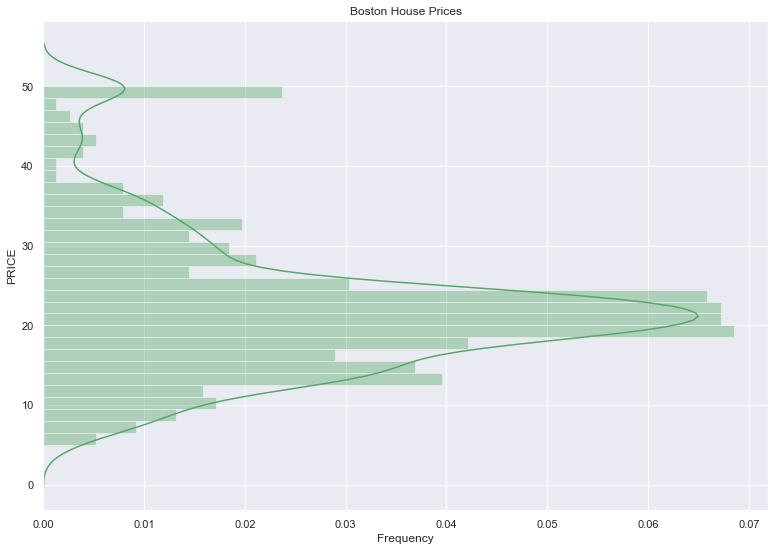

In [48]:
# Use seaborn to create a plot
# Use color codes to change color
sns.set_color_codes()

# Re-size the displot
sns.set(rc={'figure.figsize':(13,9)})

# Create a displot to show the 'Price'
sns.distplot(data['PRICE'], bins=30, vertical=True, color="g")

#Title
plt.title("Boston House Prices")       

# X -axis description
plt.xlabel("Frequency")

#Print plot
plt.show()

As we can see from the plot above, the majority of the property prices are between the \\$15000 and the \\$25,000 mark which was indicated from the above table with the mean at \\$22,500 while there are a few outliners in the min and max value. 

Next shows the skewness and kurtosis based on the price of the houses.

In [49]:
# show skewness and kurtosis
print("Skewness: %.2f" % data['PRICE'].skew())
print("Kurtosis: %.2f" % data['PRICE'].kurt())

Skewness: 1.11
Kurtosis: 1.50


The main difference between skewness and kurtosis is that the former talks of the degree of symmetry, whereas the latter talks of the degree of peakedness, in the frequency distribution [2]. As the price is above 1, the data is positively highly skewed. Positive Skewness means when the tail on the right side of the distribution is longer or fatter. This indicates that the mean and median will be greater than the mode [3].

The krutosis is 1.50. This distribution has kurtosis statistic similar to that of the normal distribution. It means that the extreme values of the distribution are similar to that of a normal distribution characteristic [3].

Let's display our dataset in histogram plot.

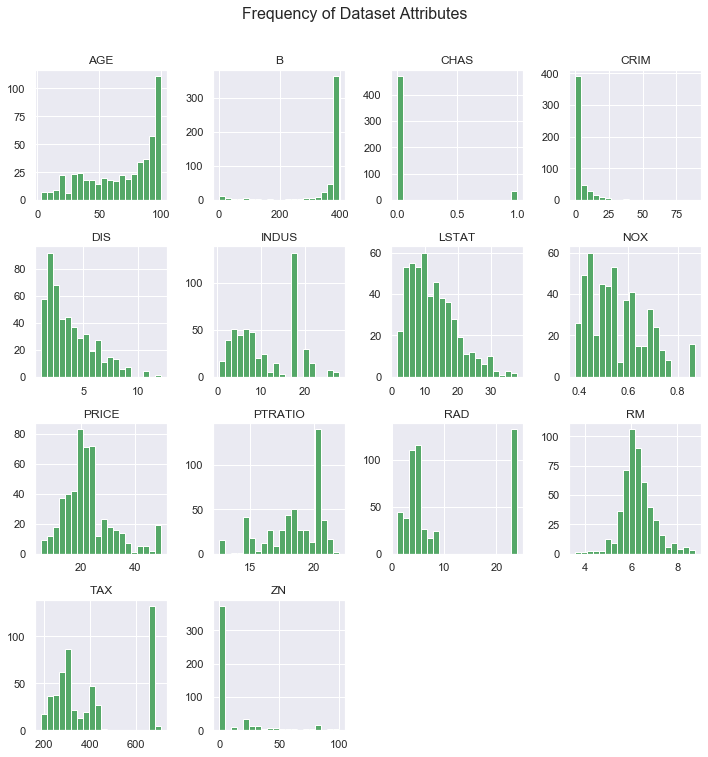

In [50]:
# Create a histogram for 
data.hist(bins=20,figsize=(10,10),grid=True, color='g')

# Title of Histogram
plt.suptitle('Frequency of Dataset Attributes', y=1.05, size=16)
plt.tight_layout()

The above plots a histogram for all attributes and price. It shows the frequency of the values that appear in the dataset. For example, if we look at that attribute CHAS (Charles River dummy variable), we can see that there are two values 0 and 1 with the number of properties over 400 not tracking near the river and under 50 tracking near the property. Both PRICE and RM have the closet relationship to normal distribution.

AGE has a positive skewness; this indicates that mean and median will be greater than the mode while LSTAT has negative skewness indicating the mean and median will be less than the mode. For TAX, we find a large amount of the distribution is around 700.

Let's use a pairplot to visualise the relationship between two variables

<Figure size 800x640 with 0 Axes>

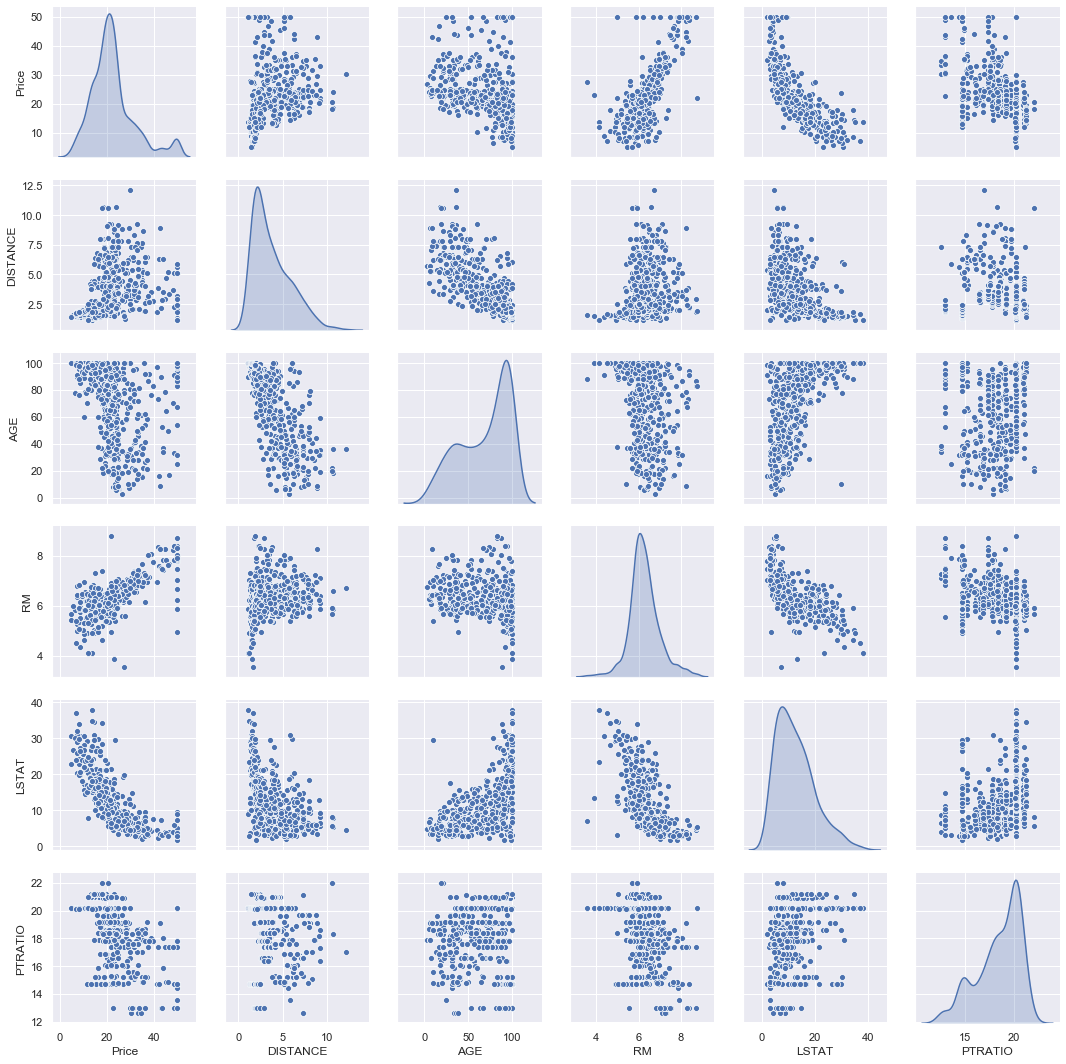

In [51]:
# Use a pairplot to visualise the relationship between variables
df = pd.DataFrame(data={'Price': data.PRICE,'DISTANCE':data.DIS, 'AGE': data.AGE, 'RM': data.RM, 'LSTAT': data.LSTAT, 'PTRATIO': data.PTRATIO})

# Plot pairplot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, diag_kind="kde")
plt.show()

Using the above data, we will select a number of different attributes and plot their relationship. For example, AGE is the proportion of owner-occupied units built prior to 1940 while 'RM' is average rooms per dwelling. The majority of properties are built were over 80 years old with the average above six rooms per dwelling. From the plot show that the pupil teacher ratio vs % lower status of the population. This is distributed evenly, and lower-class population have relatively similar pupil teacher ratio as higher class. Like the RM variable, plot shows that the number of pupil vs teacher ratio increases the price of the property.

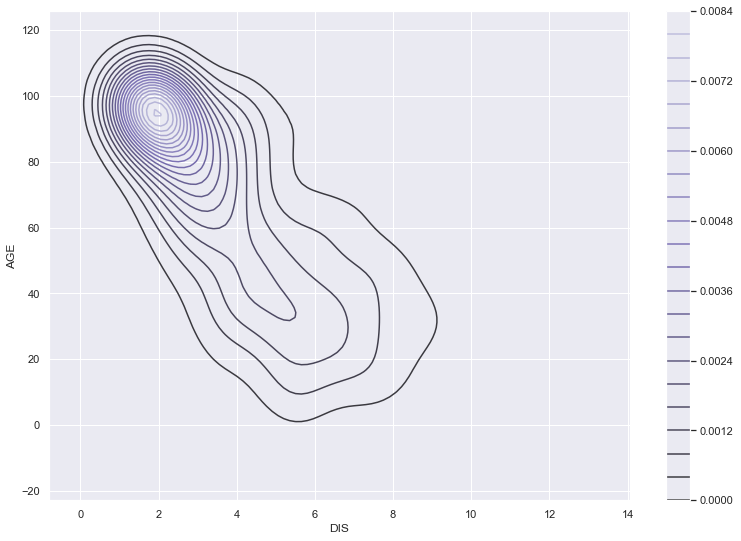

In [52]:
# visualize the probability distribution of Distance and Age 
sns.kdeplot(data["DIS"], data["AGE"],n_levels=20, cmap="Purples_d", shade=False, cbar= "True")

This plot shows that dwellings closet to the city centre are the oldest. This would be a correct presumption as the city would be built have the centre outwards as in any old city.

## 2. Inferential Statistics

Statistical inference is the process of using data analysis to deduce properties of an underlying probability distribution [6]. Inferential statistical analysis for example will test if there are signiﬁcant diﬀerences in median house prices between houses that are along the Charles river and those that aren’t deriving estimates.

But first, we will create a correlation matrix. A correlation matrix is a table showing correlation coefficients between all variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data using the seaborn library [7]. The correlation coefficient ranges from -1 to 1. If the value is close to 1, this indicates there is a strong relationship between these two variables and the opposite can be said about if the value is closer to - 1. 

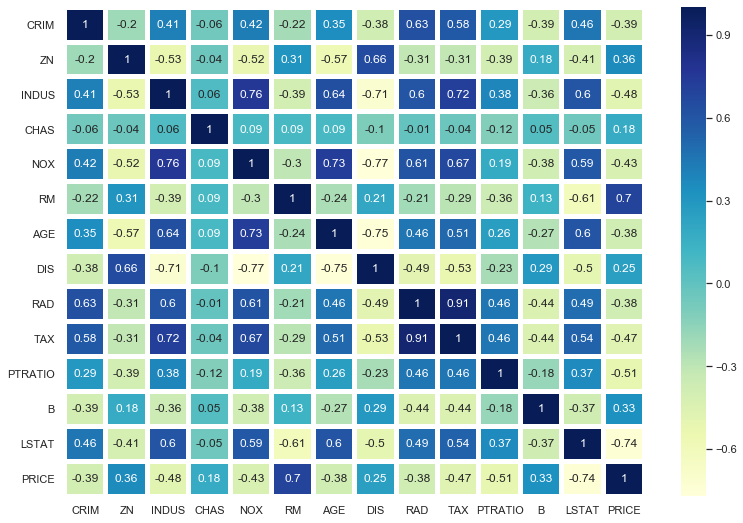

In [53]:
# create a matrix to show the interaction between variables. Round data to 2 deciaml places
correlation_matrix = data.corr().round(2)

# Use annot to input data into square wtth color "YlGnBu"
sns.heatmap(data=correlation_matrix, linewidths=4, annot=True, cmap="YlGnBu")

# Re-size the matrix
sns.set(rc={'figure.figsize':(15,8)})

The correlation between CHAS and price is 0.18. This is relatively neutral meaning properties near/far the Charles river does not have an impact on price of the property.  

We can also see from the correlation matrix, the number of rooms per dwelling 'RM' has the biggest positive impact on the price of a house at 0.70. This indicates that the number of rooms per dwelling has a positive impact on the price of price of the property. For example, if the property has 8 rooms vs 2 rooms then the price is likely to be higher.

Other's that have a similar impact on price like 'RM' include 'ZN' (proportion of residential land zoned for lots over 25,000 sq. Ft.) at 0.37, and 'B' (1000(Bk - 0.63) ^2 where Bk is the proportion of blacks by town) at 0.33.

The opposite can be said in relation to 'LSTAT' (LSTAT - % lower status of the population) at -0.74 and ‘PTRATIO' at -0.51. This indicates that where there is more lower-class families and pupil teacher ratios this reduces the price of property.


#### T-Tests

We will use T-Tests to analyse whether there is a signiﬁcant diﬀerence in median house prices between houses that are along the Charles river and those that aren’t. The test works by checking the means from two samples to see if they are significantly different from each other. It does this by calculating the standard error in the difference between means, which can be interpreted to see how likely the difference is, if the two samples have the same mean (the null hypothesis) [8].

We can interpret the statistic value, by retrieve the cumulative probability of observing the absolute value of the t-statistic using the cumulative distribution function (CDF) of the t-distribution in order to calculate a p-value. The p-value can then be compared to a chosen significance level (alpha) such as 0.05 to determine if the null hypothesis can be rejected:

If p > alpha: Accept null hypothesis that the means are equal.
If p <= alpha: Reject null hypothesis that the means are equal. [8]

We are going to use the independent samples; the case where two samples are unrelated to test our theory. We begin by splitting the dataset for the price of  'CHAS' between  near and far from the Charles river.

In [54]:
# Extract data for mean price near Charles river (NCR) and far from Charles River (NOCR)
NCR = data[data['CHAS'] == 1]['PRICE']
NOCR = data[data['CHAS'] == 0]['PRICE']

# Calculate the mean price for near the Charles river
NCR.mean()
print("The mean price of property located near the Charles River:",NCR.mean())

The mean price of property located near the Charles River: 28.44


In [55]:
# Calculate the mean price for not near the Charles River
NOCR.mean()
print("The mean price of property not located near the Charles River:",NOCR.mean())

The mean price of property not located near the Charles River: 22.093842887473482


As we can see from the data, the mean price of properties located near the river is higher than the properties located not near the river. There is a difference of over $6,000.

In [56]:
# Run an independent t-test 
stats.ttest_ind(NCR,NOCR)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [57]:
# Import library and run weighstats
import statsmodels.stats.weightstats as ws
ws.ttest_ind(NCR, NOCR)

(3.9964374660905095, 7.390623170519883e-05, 504.0)

Using both the independent stats.ttest and the weighted stats ttest, our null hypothesis is testing that houses located near and far from the Charles River that both groups are statistically significantly similar. Here, the p-value is less than 0.05, this indicates strong evidence against the null hypothesis, so the null hypothesis is rejected.

Let's plot both the mean price of the properties located for both near and far from the Charles River. Show the split of the properties. 

In [58]:
river_table = pd.crosstab(index=data['CHAS'], columns=['Price'])
river_table

col_0,Price
CHAS,
0.0,471
1.0,35


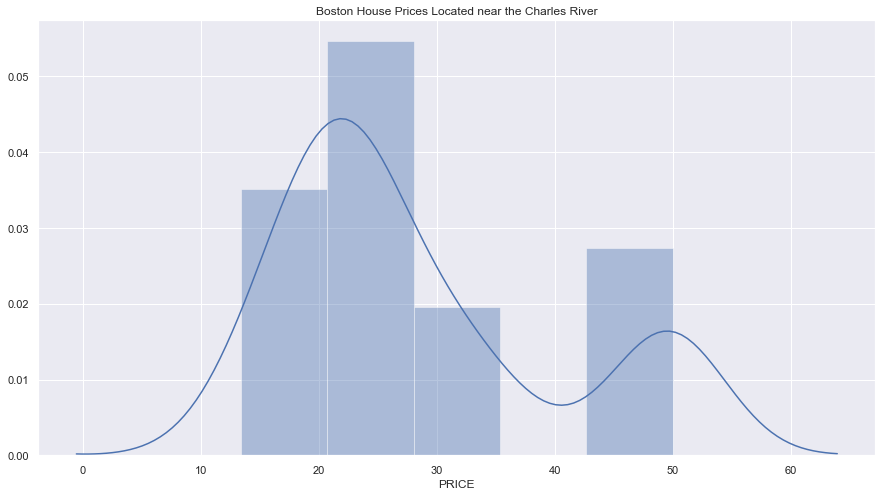

In [59]:
# Title
plt.title("Boston House Prices Located near the Charles River")       

#Print plot
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(NCR)

We can see that the majority of the houses located near the Charles River is over $20k. We must take into consideration that our sample sides is small with only 35 properties located near the river compared with 471 not located near the river.

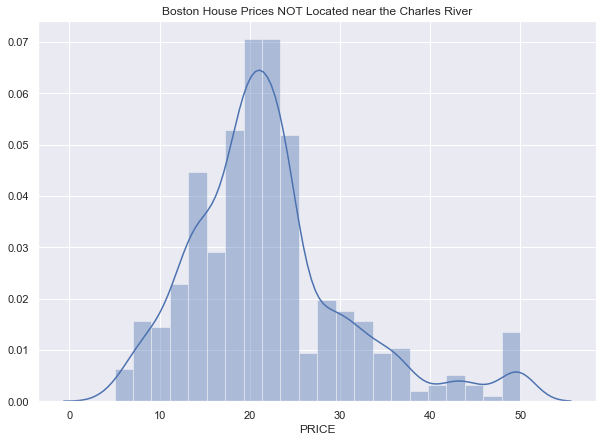

In [60]:
# Title
plt.title("Boston House Prices NOT Located near the Charles River")       

#Print plot
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(NOCR)

We can see that the houses not located near the Charles River are spread evenly between \\$15k and $25k like our full dataset. Let's show linear regression for a positive and negative impact on price.

In statistics, linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable ('RM', 'LSTAT'), and the other is considered to be a dependent ('Price') variable [4]. A dependent variable is a particular quantity that we ask a question about in our study. An explanatory variable is any factor that can influence the dependent variable. While there can be many explanatory variables, we will primarily concern ourselves with a single explanatory variable [5].A scatterplot can be a helpful tool in determining the strength of the relationship between two variables.[4]

Before attempting to fit linear regression line to observed data, we must first determine whether or not there is a relationship between the variables of interest [4]. We will use a one variable that has a positive and negative impact on price i.e. 'RM' and 'LSTAT'. A regression line is simply a single line that best fits the data (in terms of having the smallest overall distance from the line to the points). Statisticians call this technique for finding the best-fitting line a simple linear regression analysis using the least squares method [5].


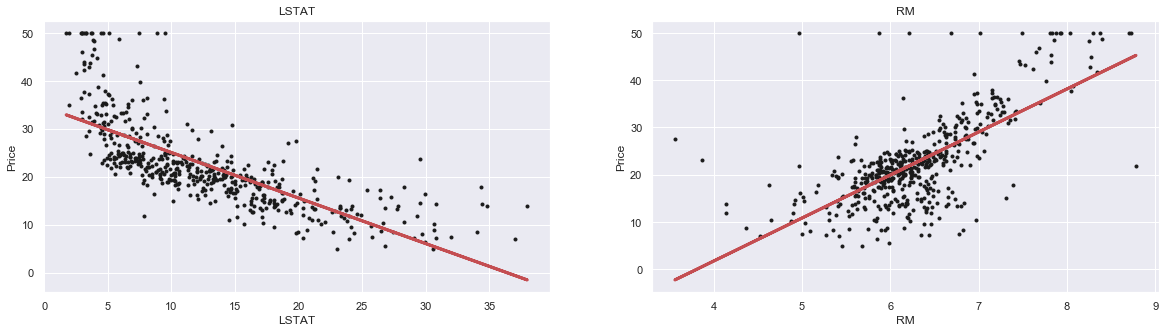

In [61]:
# Size the plot 
plt.figure(figsize=(20, 5))

# Plot for explanatory and dependent variables
explanatory = ['LSTAT', 'RM']
dependent = data['PRICE']


# Loop over explanatory variables 
for i, col in enumerate(explanatory):
    plt.subplot(1, len(explanatory) , i+1)
    x = data[col]
    y = dependent
    
    # Do regression on the x and y arrays using numpy where c is constant and m is slope
    m, c = np.polyfit(x, y, 1)
    
    # Plot x and y and the regression line in red 
    plt.plot(x, y, 'k.')
    plt.plot(x, m * x + c, 'r-', linewidth=3)
    
    
    # Title and x and y names
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Price')  

From the plots, we can see that the prices tend to decrease with more lower-class workers (LSTAT - % lower status of the population) as lower class workers would have less money to spend on a home. While prices tend to rise with the increase in rooms in each dwelling (RM) as the more rooms in a house would increase the square footage making larger than one's with less rooms. The same can be said about tax income, if people earn less money it is likely that their home are worth less.
We created a regression line in our scatterplot which is simply a single line that best fits the data (in terms of having the smallest overall distance from the line to the points). The formula for the best-fitting line (or regression line) is
$$ y = mx+c $$
, where m is the slope of the line and c is the y-intercept [5].



## 3. Neural Network

For this part of the project, we must create a neural network that can predict the median house price based on the other variables in the dataset. Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input [9].

Neural networks help us cluster and classify. You can think of them as a clustering and classification layer on top of the data you store and manage. They help to group unlabeled data according to similarities among the example inputs, and they classify data when they have a labeled dataset to train on [9]

Neural Networks consist of the following components:
    1. An input layer, 
    2. An arbitrary amount of hidden layers
    3. An output layer, 
    4. A set of weights and biases between each layer
    5. A choice of activation function for each hidden layer [10].
    
The below diagram is a example of 2-layer neural network.

<img src="https://upload.wikimedia.org/wikipedia/commons/9/99/Neural_network_example.svg" style="width: 250px;"/>

Before you can make predictions, you must train a final model. Creating a train and test split of your dataset is one method to quickly evaluate the performance of an algorithm on your problem.

The training dataset is used to prepare a model, to train it. We pretend the test dataset is new data where the output values are withheld from the algorithm. We gather predictions from the trained model on the inputs from the test dataset and compare them to the withheld output values of the test set.

Comparing the predictions and withheld outputs on the test dataset allows us to compute a performance measure for the model on the test dataset. This is an estimate of the skill of the algorithm trained on the problem when making predictions on unseen data [11]. To split the data we use train_test_split function provided by scikit-learn library.

The variables with the positive and negative impact on price will be used as a variable. 'RM' at 0.70 and 'B' at 0.33 both have a positive impact on price while 'LSTAT' at -0.74 and 'PTRATIO' at -0.51 both have negative impact on price. I will be setting the test size at 30%.

It would be problematic to feed into a neural network values that all take wildly different ranges. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in python using the scale() function [12].

In [63]:
# Generate two variables
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM'], data['PTRATIO'], data['B']], columns = ['LSTAT','RM', 'PTRATIO', 'B'])
Y = data['PRICE']

# Standardise the X value using scaler
scaler = StandardScaler().fit(X_train)
scaled_X = scaler.transform(X)

# Split dataset into train and test. Test portion 33% test size
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = 0.30, random_state = 5)
print("X Train :",X_train.shape)
print("X Test  :",X_test.shape)
print("Y Train :",Y_train.shape)
print("X Test  :",Y_test.shape)

X Train : (354, 4)
X Test  : (152, 4)
Y Train : (354,)
X Test  : (152,)


The next step in build our model. We create a Sequential model and add layers one at a time until we are happy with our network architecture. The first thing to get right is to ensure the input layer has the right number of input features [13]. 

In this case, we have 4 inputs; 'LSTAT', 'RM', 'PTRATIO' & 'B'. 

Activation, optimizer,loss

In [ ]:
# Build neural network
model = models.Sequential()

# Add layers to your model
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit model
model.fit(X, y, epochs=200, verbose=0)

# Summary
model.summary()

In [ ]:
# https://www.kdnuggets.com/2018/06/basic-keras-neural-network-sequential-model.html

In [ ]:
# https://www.tensorflow.org/tutorials/keras/regression

## Do whiteing as well as standerscaler


https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [ ]:
# https://gogul.dev/software/regression-example-boston-housing-prices

In [ ]:
https://machinelearningmastery.com/train-final-machine-learning-model/

In [ ]:
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [ ]:
https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

In [203]:
model = create_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_38 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_39 (Dense)             (None, 40)                1240      
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 41        
Total params: 1,631
Trainable params: 1,631
Non-trainable params: 0
_________________________________________________________________


The train spilt has 339 while test split is 167. This gives us a total of 506

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

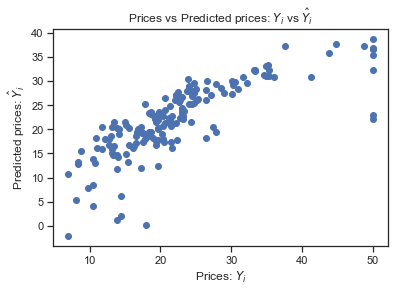

In [120]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Mean Square Error
To check the level of error of a model, we can Mean Squared Error. It will check the difference between actual value and the predicted value. For the full theory.[15]

In [121]:
mse = mean_squared_error(Y_test, Y_pred)
print(mse)

34.71949123964307


That means that the model isn’t a really great linear model. But, as a start, it is a good way to go. I actually still don’t understand how to know the value of acceptable mean squared error.[15]

Split the data into training and testing subsets. the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [122]:
# https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
# We will evaluate our model using RMSE and R2-score
# model evaluation for training set
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.336540235231381
R2 score is 0.6432412744361098


The model performance for testing set
--------------------------------------
RMSE is 5.892324773775039
R2 score is 0.6296344935050338


In [75]:
history = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), epochs=339, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Train on 339 samples, validate on 167 samples
Epoch 1/339
339/339 [==============================] - 1s 2ms/step - loss: 361.8283 - mean_absolute_error: 17.5928 - val_loss: 263.0469 - val_mean_absolute_error: 14.8686
Epoch 2/339
339/339 [==============================] - 0s 188us/step - loss: 185.5096 - mean_absolute_error: 12.4975 - val_loss: 101.7050 - val_mean_absolute_error: 9.2079
Epoch 3/339
339/339 [==============================] - 0s 88us/step - loss: 54.9001 - mean_absolute_error: 6.6316 - val_loss: 13.9317 - val_mean_absolute_error: 3.3430
Epoch 4/339
339/339 [==============================] - 0s 76us/step - loss: 3.9736 - mean_absolute_error: 1.4387 - val_loss: 1.0640 - val_mean_absolute_error: 0.9828
Epoch 5/339
339/339 [==============================] - 0s 68us/step - loss: 2.9210 - mean_absolute_error: 1.6065 - val_loss: 3.1062 - val_mean_absolute_error: 1.6787
Epoch 6/339
339/339 [==============================] - 0s 62us/

339/339 [==============================] - 0s 56us/step - loss: 0.0092 - mean_absolute_error: 0.0771 - val_loss: 0.0130 - val_mean_absolute_error: 0.0838
Epoch 98/339
339/339 [==============================] - 0s 53us/step - loss: 0.0088 - mean_absolute_error: 0.0682 - val_loss: 0.0130 - val_mean_absolute_error: 0.0789
Epoch 99/339
339/339 [==============================] - 0s 65us/step - loss: 0.0084 - mean_absolute_error: 0.0694 - val_loss: 0.0121 - val_mean_absolute_error: 0.0803
Epoch 100/339
339/339 [==============================] - 0s 65us/step - loss: 0.0081 - mean_absolute_error: 0.0690 - val_loss: 0.0118 - val_mean_absolute_error: 0.0775
Epoch 101/339
339/339 [==============================] - 0s 62us/step - loss: 0.0078 - mean_absolute_error: 0.0653 - val_loss: 0.0114 - val_mean_absolute_error: 0.0760
Epoch 102/339
339/339 [==============================] - 0s 65us/step - loss: 0.0075 - mean_absolute_error: 0.0670 - val_loss: 0.0108 - val_mean_absolute_error: 0.0759
Epoch 10

Epoch 192/339
339/339 [==============================] - 0s 59us/step - loss: 5.5729e-05 - mean_absolute_error: 0.0062 - val_loss: 7.2408e-05 - val_mean_absolute_error: 0.0069
Epoch 193/339
339/339 [==============================] - 0s 65us/step - loss: 5.1982e-05 - mean_absolute_error: 0.0060 - val_loss: 6.8968e-05 - val_mean_absolute_error: 0.0065
Epoch 194/339
339/339 [==============================] - 0s 58us/step - loss: 4.9708e-05 - mean_absolute_error: 0.0057 - val_loss: 6.2140e-05 - val_mean_absolute_error: 0.0067
Epoch 195/339
339/339 [==============================] - 0s 55us/step - loss: 4.5120e-05 - mean_absolute_error: 0.0056 - val_loss: 6.1001e-05 - val_mean_absolute_error: 0.0059
Epoch 196/339
339/339 [==============================] - 0s 65us/step - loss: 4.1549e-05 - mean_absolute_error: 0.0052 - val_loss: 5.3639e-05 - val_mean_absolute_error: 0.0062
Epoch 197/339
339/339 [==============================] - 0s 59us/step - loss: 4.0063e-05 - mean_absolute_error: 0.0053 -

Epoch 283/339
339/339 [==============================] - 0s 58us/step - loss: 1.1195e-07 - mean_absolute_error: 2.4104e-04 - val_loss: 1.8047e-07 - val_mean_absolute_error: 2.5091e-04
Epoch 284/339
339/339 [==============================] - 0s 62us/step - loss: 9.0109e-08 - mean_absolute_error: 1.9074e-04 - val_loss: 2.0382e-07 - val_mean_absolute_error: 2.2917e-04
Epoch 285/339
339/339 [==============================] - 0s 62us/step - loss: 8.3405e-08 - mean_absolute_error: 1.7662e-04 - val_loss: 1.7844e-07 - val_mean_absolute_error: 2.1763e-04
Epoch 286/339
339/339 [==============================] - 0s 65us/step - loss: 1.1308e-07 - mean_absolute_error: 2.2916e-04 - val_loss: 2.1662e-07 - val_mean_absolute_error: 2.3283e-04
Epoch 287/339
339/339 [==============================] - 0s 65us/step - loss: 1.0027e-07 - mean_absolute_error: 1.9888e-04 - val_loss: 2.6220e-07 - val_mean_absolute_error: 2.8164e-04
Epoch 288/339
339/339 [==============================] - 0s 59us/step - loss: 8.

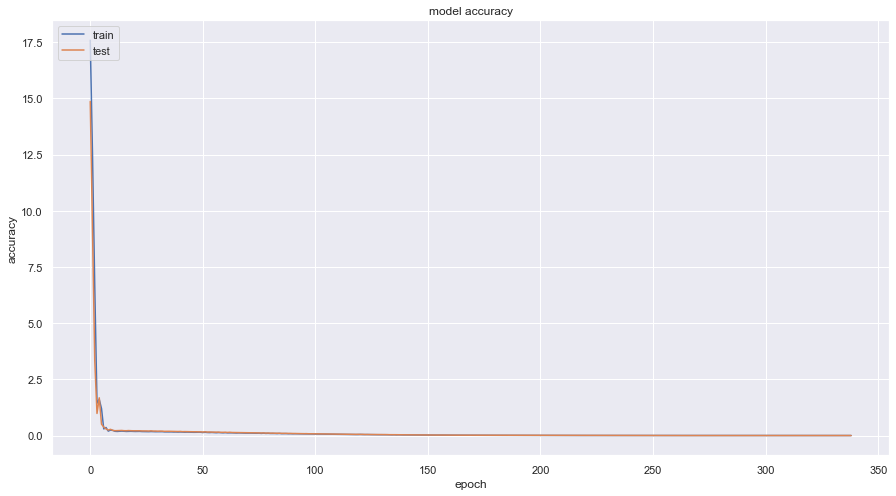

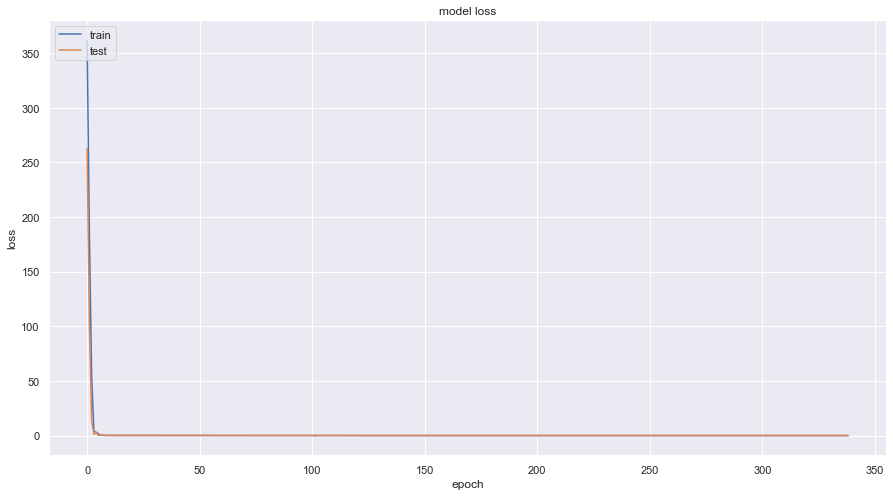

In [76]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This result is not very good and gives us a mean absolute error just above 20000 dollars. I beleive this model performs bad due to the fact that we have a quite small data-set becuase a neural network performs the best when having a big dataset[19]

In [ ]:
# https://levelup.gitconnected.com/predict-boston-house-prices-using-python-linear-regression-90469e0a341

# https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1

# https://www.kaggle.com/erick5/predicting-house-prices-with-machine-learning

# https://jjallaire.github.io/deep-learning-with-r-notebooks/notebooks/3.6-predicting-house-prices.nb.html

# https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f

# https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras

### https://medium.com/@cyrilivargarcia/tensorflow-and-keras-a-beginners-tutorial-by-a-beginner-abd4c90f814f

### References

1. https://en.wikipedia.org/wiki/Descriptive_statistics

2. https://keydifferences.com/differences-between-skewness-and-kurtosis.html

3. https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

4. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm

5. https://www.dummies.com/education/math/statistics/how-to-calculate-a-regression-line/

6. https://en.wikipedia.org/wiki/Statistical_inference

7. https://www.displayr.com/what-is-a-correlation-matrix/

8. https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

9. https://skymind.ai/wiki/neural-network

10. https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

11. https://machinelearningmastery.com/train-final-machine-learning-model/

12. https://jjallaire.github.io/deep-learning-with-r-notebooks/notebooks/3.6-predicting-house-prices.nb.html

13. https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

http://www.neural.cz/dataset-exploration-boston-house-pricing.html

https://www.datavedas.com/inferential-statistics-in-python/

1. https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

3. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

5. https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

7. https://rstudio-pubs-static.s3.amazonaws.com/364346_811c9012a14847428c9b1fc1e956431a.html?source=post_page---------------------------